In [23]:
# This notebook runs a test code
import numpy as np
import matplotlib.pyplot as plt
import random 

# load in custom library
import lunar_processes as pr

# for testing time
import time


In [24]:
24.05%24

0.05000000000000071

In [25]:
# Establish run parameters
# Initial longitude of noon
local_noon = 0

# Run time in lunar hours
t = 24

# Size of time step in lunar hours
dt = 1 

# Number of particles
n = 10

# 

In [19]:
# Establish plotting
# What matters?

#particles which survive the day

#what the moon would look like observed at each hour

#number cold trapped (polar, not night time. )

#amount behind/at each terminator (longitude or time of day distribution)

#particles that survive per timestep

plt.figure(figsize=(5, 5), dpi=150)
plt.hist(results[:, 4, :])
plt.ylabel('Number of particles')
plt.ylim((0, n))
plt.xlabel('Local Noon')
plt.xlim((0, 360))
plt.show()



# How many particles
local_noons = np.arange(0, 360, 7.5)

plt.figure(figsize=(5, 5), dpi=150)
for i in range(int(t/dt)):
    if i > 0:
        mask = np.isnan(results[:, 4, i])
        adj = results[:, 4, i]
        adj[mask] = 1
        hists = np.nansum(adj)
    else:
        hists = np.nansum(results[:, 4, i])
    plt.bar(local_noons[i], n-hists, width=7.5, align='center', edgecolor='k', color='pink')
plt.ylabel('Number of Particles')
plt.xlabel('Longitude of Local Noon')
plt.ylim((0, n))
plt.xlim((0, 360))
plt.show()




#def output_plots():
    
    
# I want to plot: 
## number of particles vs timestep


## final position latitude and longitude map (unclear how to do this)
    


IndentationError: unexpected indent (2792452419.py, line 2)

In [4]:
# Run code
# output format:
"""
particle number 1,  [latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step], [timesteps]
2, [above], [timesteps]
3, [], [timesteps]
..., [], [timesteps]
n, [], [timesteps]

"""


'\nparticle number 1,  [latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step], [timesteps]\n2, [above], [timesteps]\n3, [], [timesteps]\n..., [], [timesteps]\nn, [], [timesteps]\n\n'

In [5]:
# Save results


In [6]:
# Save plots


In [26]:
# establish particles

particles = np.zeros((n, 3)) # latitude, longitude,  tod
particles[:, 0] = np.deg2rad(random.choices(range(-90, 90), k=n)) # latitude in degrees
particles[:, 1] = np.deg2rad(random.choices(range(0, 360), k=n)) # longitude in degrees
particles[:, 2] = (12+(((np.rad2deg(particles[:, 1]-local_noon))*24)/360))%24 # tod, based on where local noon is


In [27]:
# run
results = np.zeros((n, 8, int(t/dt)))

# start timer
st = time.time()

# Run model for n particles, 1 lunar day time step 1/2 hr (lunar)
for i in range(0, n, 1):
    results[i, :, :] = pr.Model_MonteCarlo(particles[i, :], dt, t, local_noon)
    if i % 10 ==0:
            print('particle', i)

print('Total simulation time: %2.1f'%(time.time() - st))

print('Lunar time step: %3.2e'%(pr.sec_per_hour_M*dt))

particle 0
Total simulation time: 543.4
Lunar time step: 1.06e+05


In [28]:
header = "latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step"

loc = '/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Writing/Proposals/'
# write file to .npy, .fits, .txt and .dat

np.save(loc+'testrun3.npy', results)

from astropy.io import fits
hdu = fits.PrimaryHDU(results)
#hdul = fits.HDUList([hdu])
#hdul.writeto('new1.fits')
hdu.writeto(loc+'testrun3.fits')

#np.savetxt(loc+'testrun1.txt', results, delimiter=',')

f=open(loc+"testrun3.dat","wb")

f.write(results)

f.close()

In [9]:
print('Latitude: %2.0f, Longitude: %2.0f' %(np.rad2deg(results[1, 0, 0]), np.rad2deg(results[1, 1, 0])))

Latitude: 18, Longitude: 351


In [10]:
# for continue:
#Total simulation time: 312.8
#Lunar time step: 5.32e+04
    
# what does this mean?
# Avg ~31 seconds per particle
# Step ran every half lunar hour

# for conditions = False:
# prints lacking tod data more often. 
#Total simulation time: 533.8
#Lunar time step: 5.32e+04


# What does this suggest for larger runs?
# Max run on laptop is about 10^4, which will take a few days. Not sure on trash can or cluster

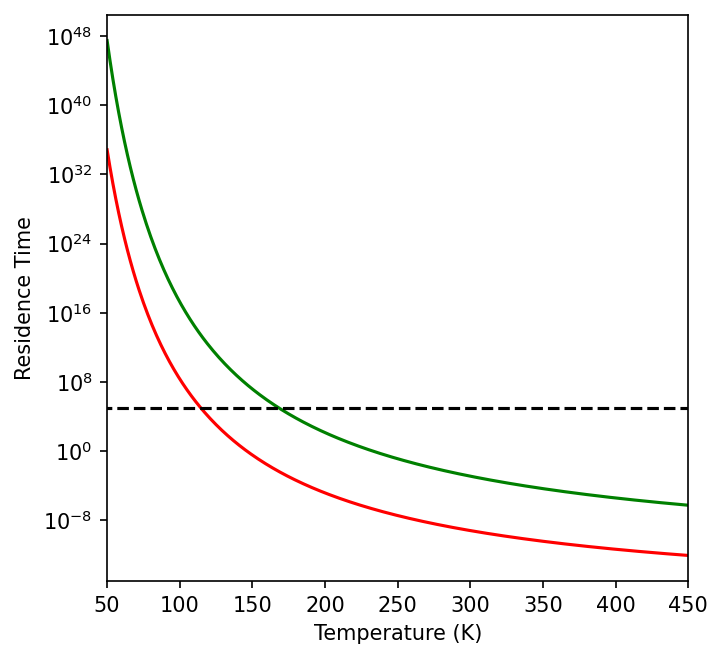

In [11]:
# compare desorption_R21 time at low Temps < ~110 K and tau_sub
# plot rates vs temperature

Temperature = np.arange(50, 450, 1)
R_bar = pr.R/(pr.m_H2O/1000)
pMass = pr.mass
    
Ed = 0.6
tau_surf = pr.desorption_R21(Temperature, Ed)

Pv = pr.clapyeron(pr.triple_P, pr.triple_T, R_bar, pr.Lc, Temperature)
sub = pr.sublimation_surf(Pv, Temperature, pMass*pr.Avo)

perc_mono = 0.01
theta_mon = 10**19 * perc_mono
tau_sub = (theta_mon * pMass) / sub

#print('Tau_Sub:', tau_sub)
#print('Tau_Surf:', tau_surf)

plt.figure(figsize=(5, 5), dpi=150)
plt.plot(Temperature, tau_sub, c='r', label='Sublimation')
plt.plot(Temperature, tau_surf, c='g', label='Desorption')
plt.hlines(pr.sec_per_hour_M, 0, 500, colors='k', linestyle='dashed')
plt.ylabel('Residence Time')
plt.xlabel('Temperature (K)')
#plt.ylim((0, 10^10))
plt.yscale('log')
plt.xlim((50, 450))
plt.show()

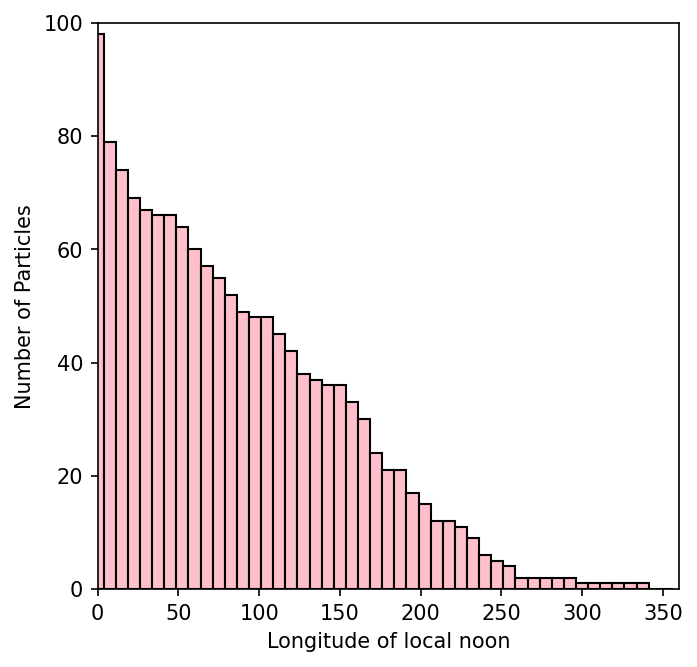